##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Guess the shape: Triangle, square, pentagon, ?

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Guess_the_shape.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

This notebook provides a quick code example showing how to use multiple images in the same prompt with the Gemini API. You'll show the model a sequence of shapes (a triangle, a square, and a pentagon) and ask it to guess the shape that comes next.

In [1]:
!pip install -U -q google-generativeai

In [2]:
import google.generativeai as genai

In [3]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
model = genai.GenerativeModel('models/gemini-pro-vision')

In [5]:
!curl -o triangle.png "https://storage.googleapis.com/generativeai-downloads/images/triangle.png" --silent
!curl -o square.png "https://storage.googleapis.com/generativeai-downloads/images/square.png" --silent
!curl -o pentagon.png "https://storage.googleapis.com/generativeai-downloads/images/pentagon.png" --silent

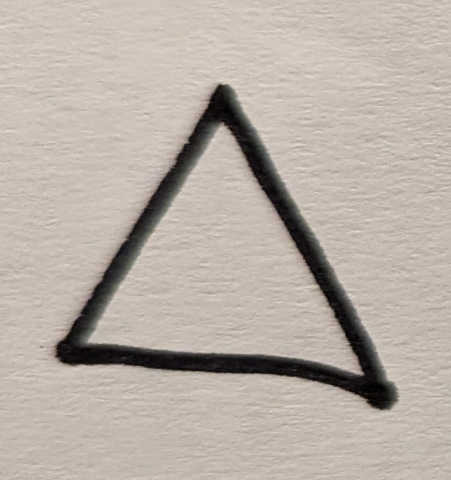

In [6]:
import PIL
from IPython.display import display

triangle = PIL.Image.open('triangle.png')
display(triangle)

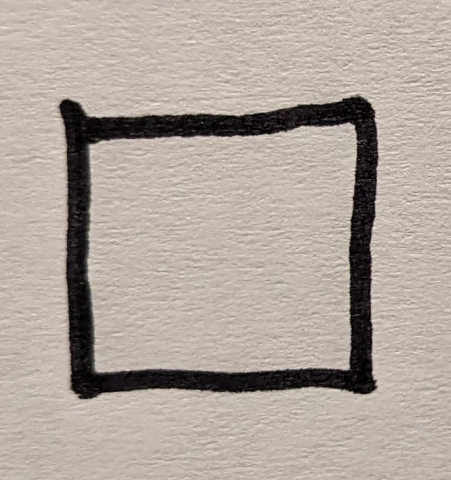

In [7]:
square = PIL.Image.open('square.png')
display(square)

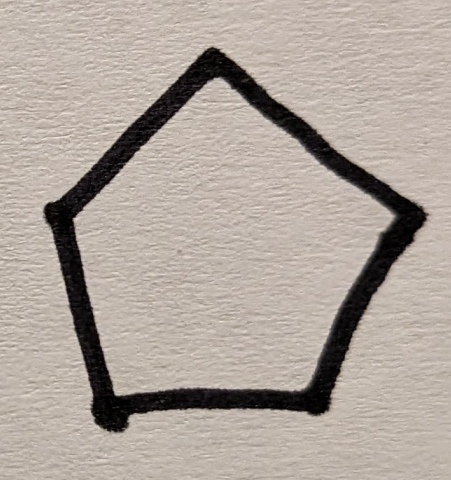

In [8]:
pentagon = PIL.Image.open('pentagon.png')
display(pentagon)

In [9]:
prompt = """Look at this sequence of three shapes. What shape should come as the fourth shape? Explain
your reasoning with detailed descriptions of the first shapes."""

In [10]:
response = model.generate_content([prompt, triangle, square, pentagon])
print(response.text)

 The next shape should be a hexagon. The number of sides in each shape increases by one. The first shape has three sides, the second shape has four sides, and the third shape has five sides. Therefore, the next shape should have six sides.


## Further reading

In this notebook, we included our images directly in the prompt. This is fine for small images. If your prompts will exceed 20MB in size, you can use the [Files API](https://github.com/google-gemini/cookbook/tree/main/preview/file-api) to upload your images (and other media types) in advance.